In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Note that , run karte samay model creation ke liye hyperparamter tuning se start and done , baaki model creation after finding best params and done other steps according to mlflow table

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(Url,usecols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Survived'])


In [3]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
from pandas_profiling import ProfileReport

report = ProfileReport(df=titanic)

In [5]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [3]:
# replacing null values with mean
titanic['Age'] = titanic['Age'].fillna(value=np.mean(titanic['Age']))

In [4]:
# converting Sex column 

titanic = pd.get_dummies(data=titanic,columns=['Sex'],drop_first=True)
titanic['Sex'] = titanic['Sex_male']
titanic.drop(axis=1,columns=['Sex_male'],inplace=True)

In [9]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# Boxplot

<AxesSubplot:>

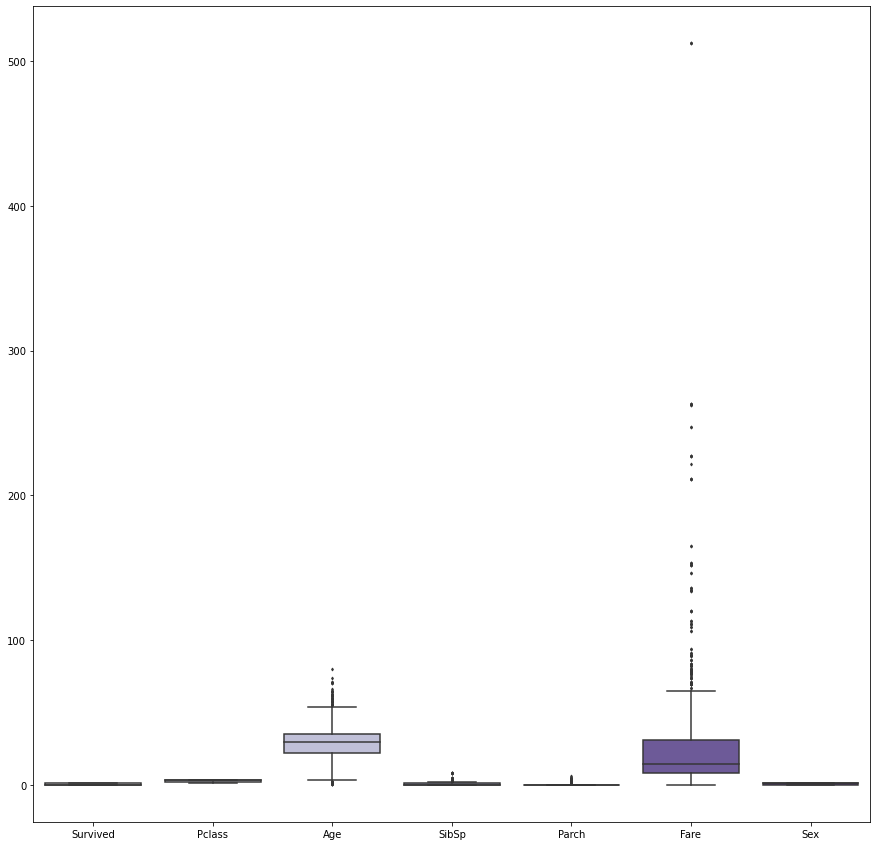

In [16]:
import seaborn as sns
%matplotlib inline
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=titanic,ax=ax,orient='v',fliersize=2,palette='Purples',width=.8)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

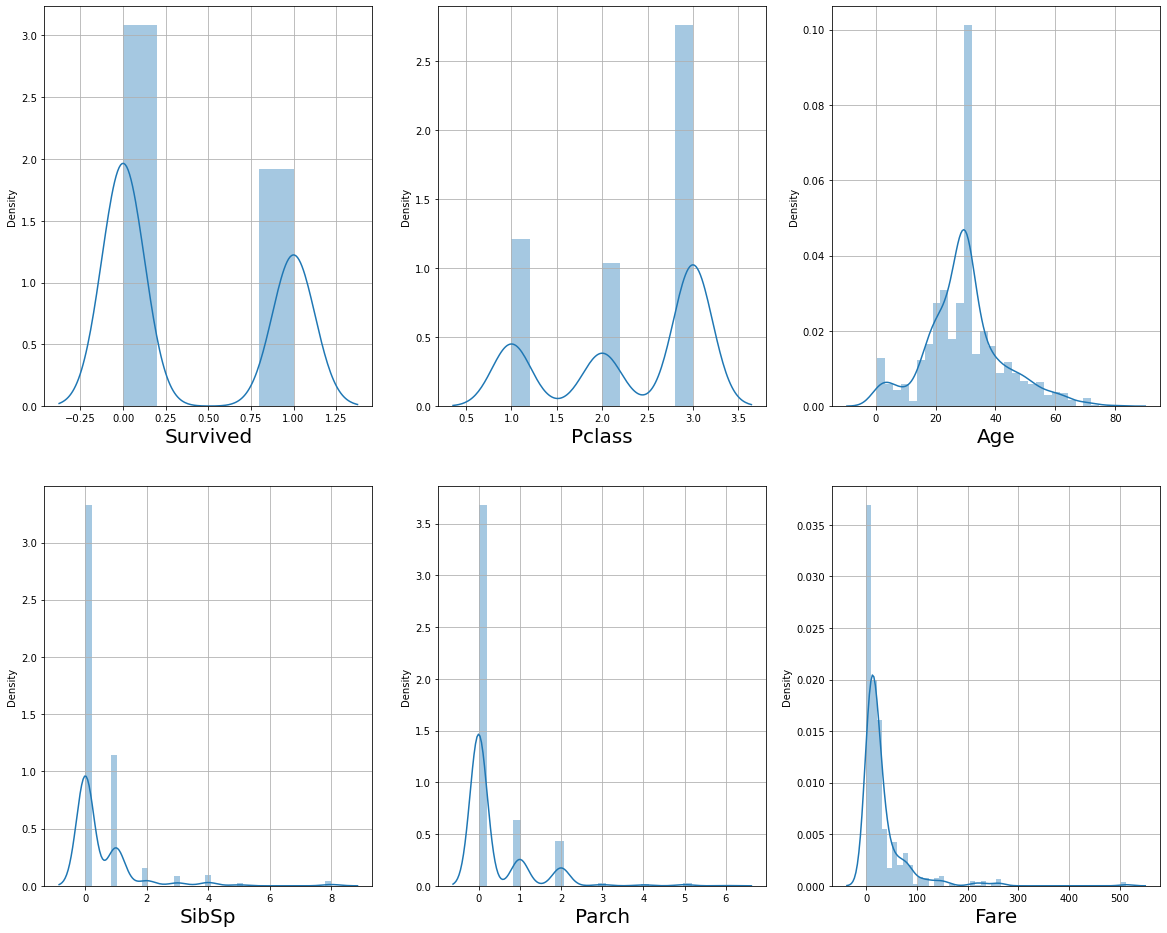

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
plt.grid()
for column in titanic:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        ax.yaxis.grid(True) # Hide the horizontal gridlines
        ax.xaxis.grid(True) # Show the vertical gridlines
        sns.distplot(titanic[column])
        
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()


# Remove Outliers

In [5]:
q = titanic['Age'].quantile(0.98)
# we are removing the top 2% data from the Age column
titanic = titanic[titanic['Age']<q]

q = titanic['SibSp'].quantile(0.99)
# we are removing the top 1% data from the SibSp column

titanic  = titanic[titanic['SibSp']<q]
q = titanic['Fare'].quantile(0.98)
# we are removing the top 2% data from the Fare column
titanic  = titanic[titanic['Fare']<q]


# Checking after removing some outliers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

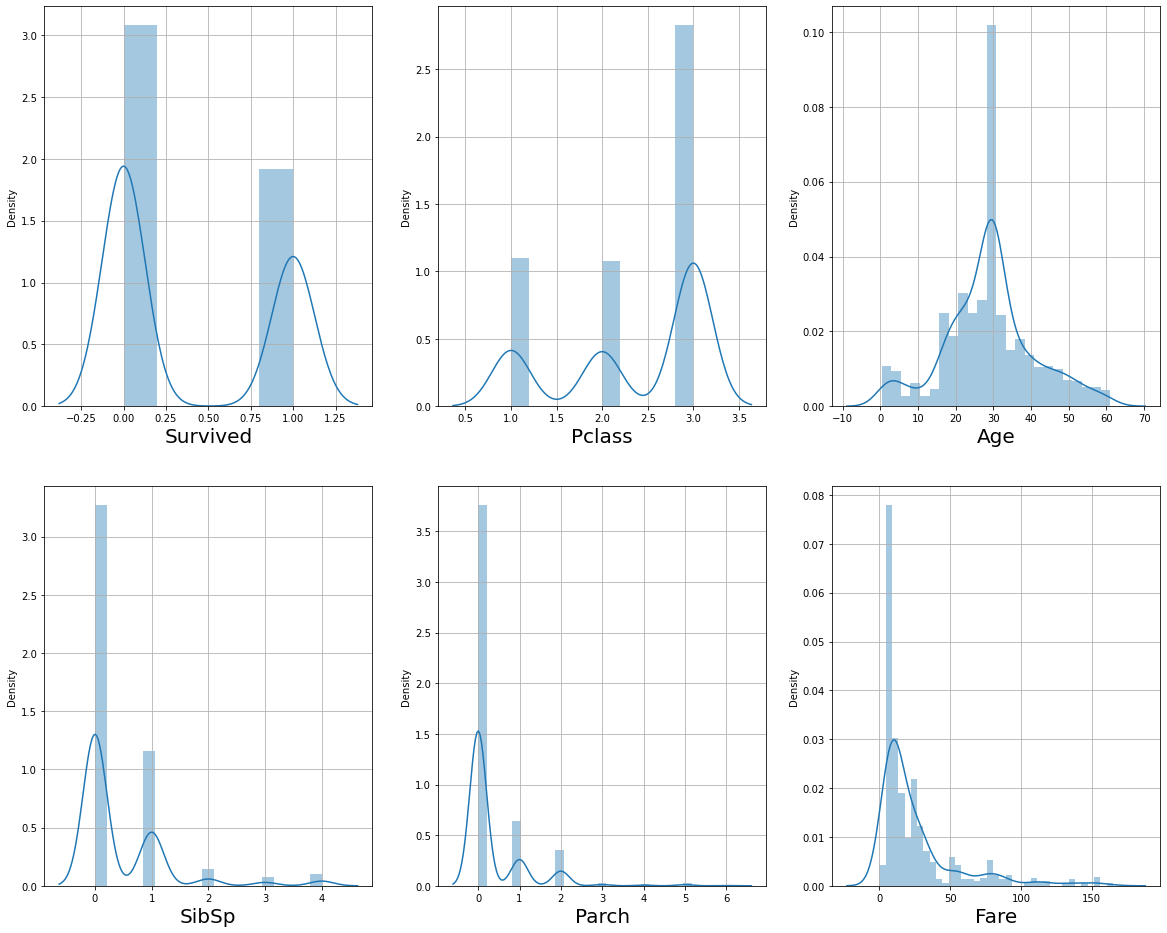

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
plt.grid()
for column in titanic:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        ax.yaxis.grid(True) # Hide the horizontal gridlines
        ax.xaxis.grid(True) # Show the vertical gridlines
        sns.distplot(titanic[column])
        
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()


# Test train split

In [6]:
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)

# Model creation and training

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

## X_Test dataset results

In [23]:
y_pred = model.predict(x_test)

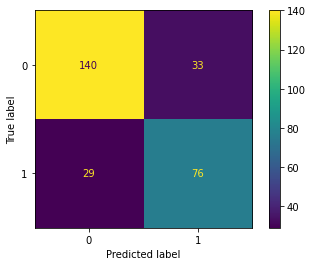

In [29]:
cm = confusion_matrix(y_test,y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [31]:
cm[1,1]

76

In [32]:
accuracy1 = (cm[0,0]+cm[1,1])/(cm.sum())
precision1 = cm[0,0]/(cm[0,0]+cm[1,0])  # ham kitne sahi hai TP wrt mein hmare Precited Positive mein se kitne actualy correct/positive hai?
recall1 = cm[0,0]/(cm[0,0]+cm[0,1])
f1_score1 = 2*precision1*recall1/(precision1+recall1)

print('accuracy : {}\nPrecision : {}\nRecall : {}\nF1_score : {}'.format(accuracy1,precision1,recall1,f1_score1))

accuracy : 0.7769784172661871
Precision : 0.8284023668639053
Recall : 0.8092485549132948
F1_score : 0.8284023668639053


## X_Train data results

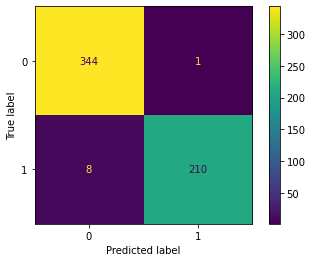

In [33]:
y_pred_train = model.predict(x_train)
cm2 = confusion_matrix(y_train,y_pred_train)

cm_display2 = ConfusionMatrixDisplay(cm2).plot()

In [34]:
accuracy2 = (cm2[0,0]+cm2[1,1])/(cm2.sum())
precision2 = cm2[0,0]/(cm2[0,0]+cm2[1,0])  # ham kitne sahi hai TP wrt mein hmare Precited Positive mein se kitne actualy correct/positive hai?
recall2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
f1_score2 = 2*precision2*recall2/(precision2+recall2)

print('accuracy : {}\nPrecision : {}\nRecall : {}\nF1_score : {}'.format(accuracy2,precision2,recall2,f1_score2))

accuracy : 0.9840142095914742
Precision : 0.9772727272727273
Recall : 0.9971014492753624
F1_score : 0.987087517934003


# Now as there is large gap betwween our train data accuracy,recall,etc and test data ones so our model is overfitted so we have to do hyperparamater tuning 

In [9]:
def get_score(model,x_train_func,x_test_func,y_train_func,y_test_func):
    model.fit(x_train_func,y_train_func)
    return model.score(x_test_func,y_test_func)

In [20]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [19]:
X.values

array([[ 3.        , 22.        ,  1.        ,  0.        ,  7.25      ,
         1.        ],
       [ 1.        , 38.        ,  1.        ,  0.        , 71.2833    ,
         0.        ],
       [ 3.        , 26.        ,  0.        ,  0.        ,  7.925     ,
         0.        ],
       ...,
       [ 3.        , 29.69911765,  1.        ,  2.        , 23.45      ,
         0.        ],
       [ 1.        , 26.        ,  0.        ,  0.        , 30.        ,
         1.        ],
       [ 3.        , 32.        ,  0.        ,  0.        ,  7.75      ,
         1.        ]])

In cross validation , we are just checking how much better can we get 

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
scores_dec_tr = []
model_boom_exp_3 = DecisionTreeClassifier()
for train_index,test_index in skfold.split(x_train.values,y_train):
#     print(train_index,test_index)
    X_train,X_test,Y_train,Y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
    scores_dec_tr.append(get_score(model_boom_exp_3, X_train,X_test,Y_train,Y_test))

print(scores_dec_tr)


[0.6637168141592921, 0.7433628318584071, 0.7079646017699115, 0.7946428571428571, 0.7857142857142857]


In [70]:
y_pred_boom = model_boom_exp_3.predict(x_test)
cm_boom = confusion_matrix(y_test,y_pred_boom)

accuracy_boom = (cm_boom[0,0]+cm_boom[1,1])/(cm_boom.sum())
precision_boom = cm_boom[0,0]/(cm_boom[0,0]+cm_boom[1,0])  # ham kitne sahi hai TP wrt mein hmare Precited Positive mein se kitne actualy correct/positive hai?
recall_boom = cm_boom[0,0]/(cm_boom[0,0]+cm_boom[0,1])
f1_score_boom = 2*precision_boom*recall_boom/(precision_boom+recall_boom)

print('accuracy : {}\nPrecision : {}\nRecall : {}\nF1_score : {}'.format(accuracy_boom,precision_boom,recall_boom,f1_score_boom))

accuracy : 0.8920863309352518
Precision : 0.9230769230769231
Recall : 0.9017341040462428
F1_score : 0.912280701754386


In [60]:
scores_cross_val = cross_val_score(DecisionTreeClassifier(),X,y,cv=skfold)
scores_cross_val               

array([0.70414201, 0.76785714, 0.80952381, 0.79166667, 0.80952381])

accuracy : 0.7769784172661871

Precision : 0.8284023668639053

Recall : 0.8092485549132948

F1_score : 0.8284023668639053

**accuracy : 0.9840142095914742**

**Precision : 0.9772727272727273**

**Recall : 0.9971014492753624**

**F1_score : 0.987087517934003**

**Summmary of today:**
1. Today we did matplotlib , learnt bit about plt.subplots used to create axis in which we can draw our graphs
2. sns.boxplot return axis and that can be plotted by specifying ax=ax_name(created by you)
3. figure() , figsize() , ax() are very useful in matplotlib

**cross validation** - used to overcome overfitting , when we do train test split then as per random state our accuracy may vary, but in cross validation it trains on all possible combinations so that our model learns better about data and our test accuracy terms(precision,recall,etc) as well as our train accuracy terms(same) are getting better even when we provide only x_train,y_train for cross validation , that is magical becoz its 89/90 % result

**Gridsearch cv**:
In this one, we select best params for model such that its accuracy terms is high , also it internally performs k fold cross validation, so our best model becomes super best 

##### But when data changes, entire process has  to be repeated to achieve same accuracy


In [63]:
X.iloc[[12,23]]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Hyperparameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model_tuned = DecisionTreeClassifier()

param_grid = {'criterion':["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9],
              'max_features': ['sqrt', 'log2', None]
             }
clf = GridSearchCV(estimator=model_tuned,param_grid=param_grid,n_jobs=-1,cv=5,verbose=3)

clf.fit(x_train, y_train)



In [11]:
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=9)
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'splitter': 'best'}


In [13]:
from sklearn.metrics import classification_report

Final_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=None,max_leaf_nodes=9,splitter='best')
Final_model.fit(x_train,y_train)
y_pred_Final_model_test = Final_model.predict(x_test)
y_pred_Final_model_train = Final_model.predict(x_train)

In [17]:
print("For train dataset\n",classification_report(y_train,y_pred_Final_model_train),"\n\n")
print("For test dataset\n",classification_report(y_test,y_pred_Final_model_test))

For train dataset
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       345
           1       0.76      0.74      0.75       218

    accuracy                           0.81       563
   macro avg       0.80      0.80      0.80       563
weighted avg       0.81      0.81      0.81       563
 


For test dataset
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       173
           1       0.77      0.71      0.74       105

    accuracy                           0.81       278
   macro avg       0.80      0.79      0.79       278
weighted avg       0.81      0.81      0.81       278



# Picling the model

In [19]:
import pickle 

pickle.dump(Final_model,open("Dec_tree_cls_model.pkl",'wb'))

In [20]:
model_file = pickle.load(open("Dec_tree_cls_model.pkl",'rb'))

In [21]:
model_file.predict(x_test)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])